<a href="https://colab.research.google.com/github/jadercaro/ClasificacionPuntajesCredito/blob/main/Clasificaci%C3%B3n_de_puntajes_de_creditos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Clasificación de puntajes de créditos bancarios**

El proyecto tiene como objetivo desarrollar un modelo de Machine Learning y Deep Learning para predecir la clasificación del score crediticio de una persona con el propósito de evaluar su elegibilidad para obtener un crédito bancario. El score crediticio es una métrica fundamental que las instituciones financieras utilizan para determinar el riesgo crediticio de un solicitante y decidir si se le debe otorgar un préstamo.

#Motivación
  Crear un modelo de Machine Learning para predecir la clasificación del score crediticio en solicitudes de crédito bancario puede revolucionar la forma en que las instituciones financieras toman decisiones. Al automatizar y mejorar la precisión de la evaluación de la solvencia crediticia, este proyecto tiene el potencial de agilizar el proceso de aprobación de préstamos, permitir un acceso más equitativo al crédito y reducir el riesgo financiero tanto para los prestatarios como para los prestamistas. Al brindar una herramienta confiable para evaluar el riesgo crediticio, contribuimos a fomentar la inclusión financiera y a empoderar a las personas con opciones más accesibles y oportunidades para alcanzar sus metas financieras.


La base de datos que usamos para este proyecto fue tomada de:
https://www.kaggle.com/datasets/parisrohan/credit-score-classification






El primer paso será cargar la base de datos en formato .CSV

In [2]:
import pandas as pd
data = pd.read_csv('train.csv')
database = data.copy()

database

<ipython-input-2-c33fde1f8629>:2: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('train.csv')


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Ahora con este método analizaremos brevemente las variables que hasta este momento son numéricas, aclaramos que en el transcurso del proyecto algunas variables pueden cambiar a tipo numericas siendo algunas de ellas la edad ('Age') la cual hasta esta instancia no se encuentra catalogada como variable númerica

In [ ]:
database.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


Ahora haremos un pequeño análisis de los datos presentes, para conocer la cantidad de datos faltantes, el equilibrio de las clases, los tipos de clases

In [ ]:
database.nunique()

ID                          100000
Customer_ID                  12500
Month                            8
Name                         10139
Age                           1788
SSN                          12501
Occupation                      16
Annual_Income                18940
Monthly_Inhand_Salary        13235
Num_Bank_Accounts              943
Num_Credit_Card               1179
Interest_Rate                 1750
Num_of_Loan                    434
Type_of_Loan                  6260
Delay_from_due_date             73
Num_of_Delayed_Payment         749
Changed_Credit_Limit          4384
Num_Credit_Inquiries          1223
Credit_Mix                       4
Outstanding_Debt             13178
Credit_Utilization_Ratio    100000
Credit_History_Age             404
Payment_of_Min_Amount            3
Total_EMI_per_month          14950
Amount_invested_monthly      91049
Payment_Behaviour                7
Monthly_Balance              98792
Credit_Score                     3
dtype: int64

In [ ]:
database.columns.to_list()

['ID',
 'Customer_ID',
 'Month',
 'Name',
 'Age',
 'SSN',
 'Occupation',
 'Annual_Income',
 'Monthly_Inhand_Salary',
 'Num_Bank_Accounts',
 'Num_Credit_Card',
 'Interest_Rate',
 'Num_of_Loan',
 'Type_of_Loan',
 'Delay_from_due_date',
 'Num_of_Delayed_Payment',
 'Changed_Credit_Limit',
 'Num_Credit_Inquiries',
 'Credit_Mix',
 'Outstanding_Debt',
 'Credit_Utilization_Ratio',
 'Credit_History_Age',
 'Payment_of_Min_Amount',
 'Total_EMI_per_month',
 'Amount_invested_monthly',
 'Payment_Behaviour',
 'Monthly_Balance',
 'Credit_Score']

In [ ]:
for column in enumerate(database.columns.to_list()):
  print(column[1], database[column[1]].unique(), '\n')

ID ['0x1602' '0x1603' '0x1604' ... '0x25feb' '0x25fec' '0x25fed'] 

Customer_ID ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0xaf61' 'CUS_0x8600'
 'CUS_0x942c'] 

Month ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'] 

Name ['Aaron Maashoh' nan 'Rick Rothackerj' ... 'Chris Wickhamm'
 'Sarah McBridec' 'Nicks'] 

Age ['23' '-500' '28_' ... '4808_' '2263' '1342'] 

SSN ['821-00-0265' '#F%$D@*&8' '004-07-5839' ... '133-16-7738' '031-35-0942'
 '078-73-5990'] 

Occupation ['Scientist' '_______' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer'
 'Lawyer' 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant'
 'Musician' 'Mechanic' 'Writer' 'Architect'] 

Annual_Income ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_'] 

Monthly_Inhand_Salary [1824.84333333           nan 3037.98666667 ... 3097.00833333 1929.90666667
 3359.41583333] 

Num_Bank_Accounts [   3    2    1    7    4    0    8    5    6    9   10 1414 1231   67
  572 1488   91  528 16

In [18]:
columnas = ['Month', 'Delay_from_due_date','Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour','Occupation']

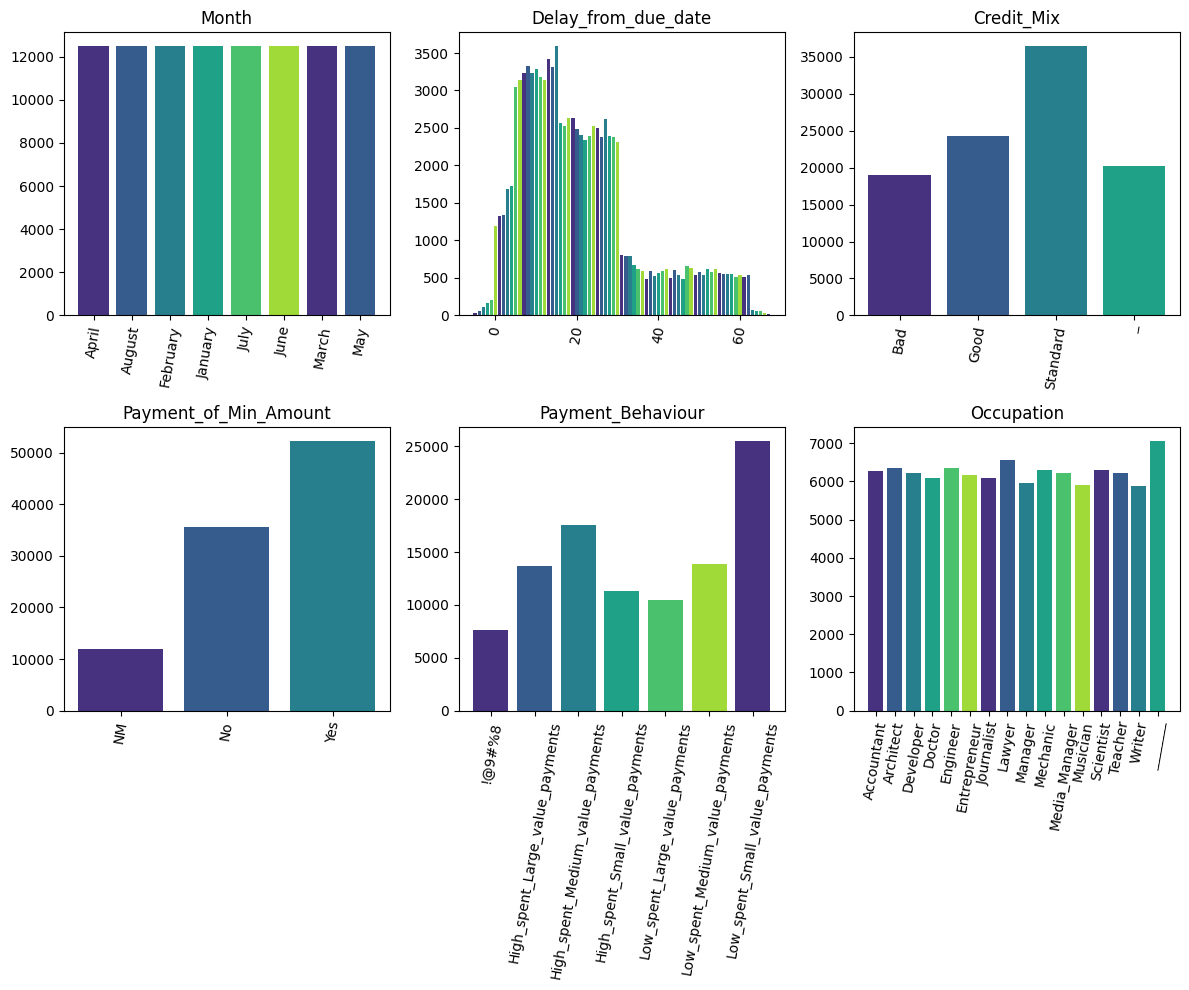

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#definimo un color personalizado para nuestras gráficas
color = sns.color_palette('viridis')

fig, axes = plt.subplots(2, 3, figsize=(12,10))
for i, columna in enumerate(columnas):
  col = i%3
  row = i//3
  unique_element, counts = np.unique(database[columna], return_counts=True)
  axes[row, col].bar(unique_element, counts, color=color)
  axes[row, col].set_title(columna)
  axes[row, col].tick_params(axis='x', rotation=80)

plt.tight_layout()
plt.show()


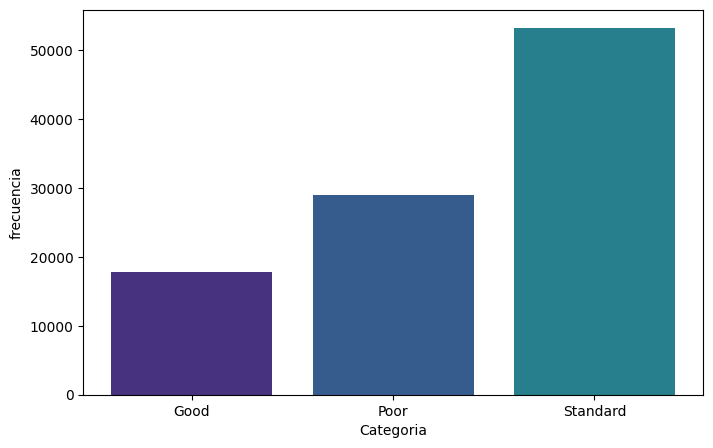

In [ ]:
unique_element, counts = np.unique(database['Credit_Score'], return_counts=True)
plt.figure(figsize=(8,5))
plt.bar(unique_element, counts, color=color)
plt.xlabel('Categoria')
plt.ylabel('frecuencia')

plt.show()

#entrenamientos estratificados
#kfalse_stratifafier

Calculamos la cantidad de datos nulos en cada columna, con este dato sabremos, aproximadamente la cantidad de datos perdidos o faltantes

In [ ]:
database.isnull().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

In [ ]:
print(database.isnull().sum().sum()/len(database) *100, '%')

60.071 %


#Manejo de valores nulos

Ya que hallamos la cantidad de valores nulos por cada columna podemos tomar las siguientes decisiones con respecto a la manipulación de estos datos:

**1)** suponiendo que cada valor nulo corresponde a una muestra diferente, estariamos ante la iminente perdida del 60% de las muestras en el peor de los casos aproximadamente siendo esta una de las posibles opciones a considerar

**2)** Otra opción a considerar es eliminar las columnas que poseen datos nulos: (Name, Monthly_Inhand_Salary, Type_of_Loan, Num_of_Delayed_Payment, Num_credit_Inquiries, credit_history_age, Amount_invested_monthly, Monthly_Balance) corriendo el riesgo de eliminar algunas variables que podrian ser significativas en el proceso.

**3)** La última opción es rellenar análiticamente los valores faltantes con ayuda de la programación


También debemos tener en cuenta que existen varios valores que no concuerdan con el dato solicitado, como por ejemplo el uso de los siguientes caracteres '____' en el campo 'Occupation' ó la mala redacción a la hora de introduccir los valores como '34_____' en el lugar de 'Age'

Empezaremos manipulando los datos mal introducidos en el 'Age'


In [3]:
contador = 0
for i in range(0,len(database)):
  if '_' in database['Age'][i]:
    contador +=1
    database['Age'][i] = database['Age'][i].replace('_','')
    database['Age'][i] = int(database['Age'][i])
print('Cantidad de errores solucionados: ',contador)

<ipython-input-3-dd1f1864e306>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['Age'][i] = database['Age'][i].replace('_','')
<ipython-input-3-dd1f1864e306>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  database['Age'][i] = int(database['Age'][i])


Cantidad de errores solucionados:  4939


In [4]:
database['Age']=database.Age.astype(int)

Con el anterior código acabamos de solucionar el 5% de las edades que tenian un caracter incorrecto y ahora 'Age' se encuentra en formato entero.


Explorando la base de datos, encontramos que existen valores atipicos, donde algunas personas tenian por edad -500 o 708 años, lo cual es absurdo.

Lo que hicimos para resolver esto fue asignarle cada cliente el valor de su edad que más se repitiera (moda)

In [8]:
print('El valor minimo de la edad es: ',database['Age'].min())
print('El valor máximo de la edad es: ', database['Age'].max())

El valor minimo de la edad es:  -500
El valor máximo de la edad es:  8698


In [9]:
#Buscamos la moda de cada cliente
moda_por_id = database.groupby('Customer_ID')['Age'].apply(lambda x: x.mode()[0]).reset_index()

In [10]:
#Creamos un diccionar Customer ID - Age
moda_dict = dict(zip(moda_por_id['Customer_ID'], moda_por_id['Age']))

In [11]:
#Remplazamos los valores en la base de datos
database['Age'] = database['Customer_ID'].map(moda_dict)

In [12]:
print('El valor minimo de la edad es: ',database['Age'].min())
print('El valor máximo de la edad es: ', database['Age'].max())

El valor minimo de la edad es:  14
El valor máximo de la edad es:  56


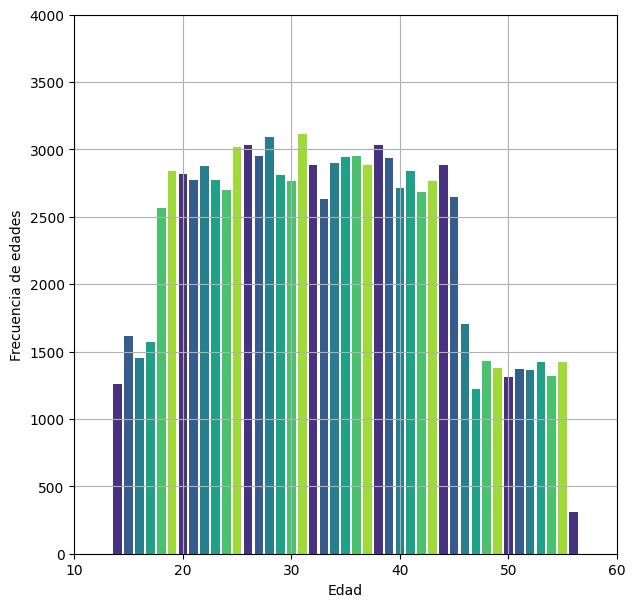

In [50]:
unique_element, counts = np.unique(database['Age'], return_counts=True)
plt.figure(figsize=(7,7))
plt.bar(unique_element, counts, color=color)
plt.ylabel('Frecuencia de edades')
plt.xlabel('Edad')
plt.axis([10,60,0,4000])
plt.grid(True)
plt.show()

Ahora procederemos a hacer lo mismo con la variable 'Occupation', ya que existe el caso en el que la misma persona no posee su trabajo y en cambio tiene '----' como caracter asignado, asi que usaremos la moda para poder reducir estos casos de mala redacción en los datos

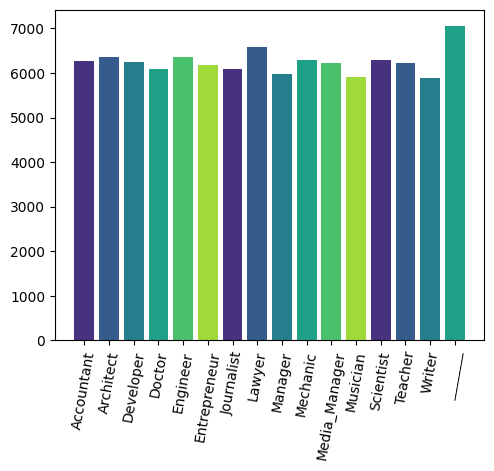

In [66]:
axes, counts = np.unique(database['Occupation'], return_counts=True)
plt.figure(figsize=(5,4))
plt.xticks(rotation=80)
plt.tight_layout()
plt.bar(axes, counts, color=color)
plt.show()


Vemos que aproximadamente hay 7000 muestras que no tienen correctamente ingresada la edad, lo cual trataremos de reducirlo

In [69]:
database['Occupation']= database['Occupation'].replace('_______', pd.NA, inplace=True)
moda_por_id = database.groupby('Customer_ID')['Occupation'].apply(lambda x: x.mode()[0]).reset_index()
moda_por_id

,Customer_ID,Occupation
0,CUS_0x1000,Lawyer
1,CUS_0x1009,Mechanic
2,CUS_0x100b,Media_Manager
3,CUS_0x1011,Doctor
4,CUS_0x1013,Mechanic
...,...,...
12495,CUS_0xff3,Scientist
12496,CUS_0xff4,Entrepreneur
12497,CUS_0xff6,Doctor
12498,CUS_0xffc,Musician


In [71]:
moda_dict = dict(zip(moda_por_id['Customer_ID'], moda_por_id['Occupation']))
database['Occupation'] = database['Customer_ID'].map(moda_dict)

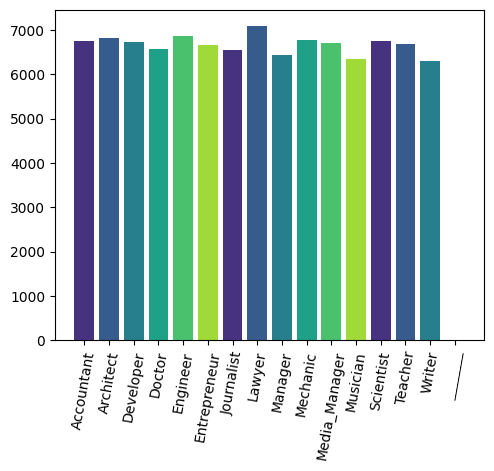

In [72]:
axes, counts = np.unique(database['Occupation'], return_counts=True)
plt.figure(figsize=(5,4))
plt.xticks(rotation=80)
plt.tight_layout()
plt.bar(axes, counts, color=color)
plt.show()